In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Simple dataset: house prices based on size and number of rooms
data = {
    'Size_sqft': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 6000],
    'Rooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Price': [200000, 250000, 270000, 320000, 360000, 400000, 450000, 480000, 500000, 550000]
}

df = pd.DataFrame(data)
print(df)

   Size_sqft  Rooms   Price
0       1000      2  200000
1       1500      3  250000
2       1800      3  270000
3       2400      4  320000
4       3000      4  360000
5       3500      5  400000
6       4000      5  450000
7       4500      6  480000
8       5000      6  500000
9       6000      7  550000


In [12]:
X = df[['Size_sqft', 'Rooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)

Ridge()

In [14]:
y_pred = ridge.predict(X_test)
print("Predicted prices:", y_pred)

Predicted prices: [501030.89768058 253246.85090035]


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5802395.398474092
R² Score: 0.9996286466944977


In [16]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_lin = linear.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred))
print("Linear R²:", r2_score(y_test, y_pred_lin))

Ridge R²: 0.9996286466944977
Linear R²: 0.9981748290612245


In [17]:
for a in [0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    print(f"Alpha={a}, R²={ridge.score(X_test, y_test):.3f}")

Alpha=0.1, R²=0.999
Alpha=1, R²=1.000
Alpha=10, R²=1.000
Alpha=100, R²=1.000


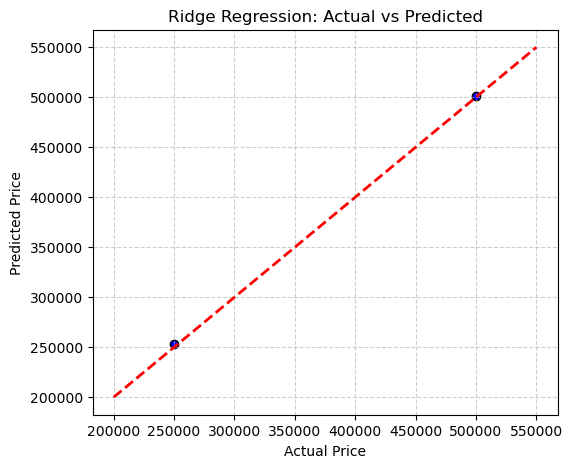

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', linewidths=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
alphas = [0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    r2_scores.append(ridge.score(X_test, y_test))

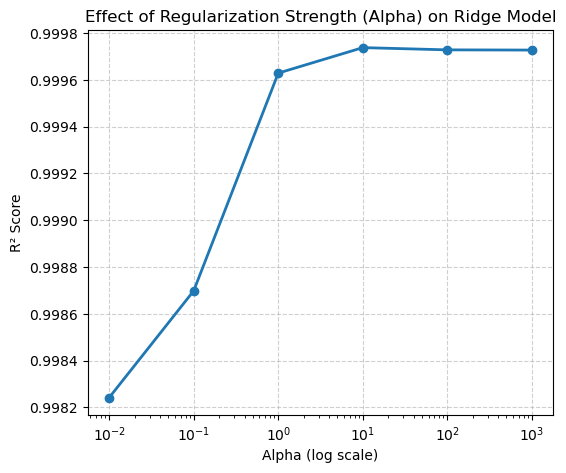

In [20]:
plt.figure(figsize=(6,5))
plt.plot(alphas, r2_scores, marker='o', linewidth=2)
plt.xscale('log')  # Log scale for clarity
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Effect of Regularization Strength (Alpha) on Ridge Model")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()